In [1]:
# Importing necessary modules.
import re
import string   
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional,Embedding
from keras.layers import Dropout, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import gensim
from gensim.models import Word2Vec

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Business Value

There are six different airline companies in this dataset; United, US Airways, American, Southwest, Delta and Virgin America. And their customers still complaining about some problems with their services/flights.
For an airline company one customer, customer's review, one cancellation flight, one hour or one minute sometimes seconds too much important for a business value. Because of business  reputation and business economic status. Instead of other industries economic status is more important at airline industry because this is a transportation company and losing every second for every mile flight.
We are going to analyze and making machine learning project for how airline companies could improve ourselves with our findings.

## Business Problem

In this project, main goal is the predict airline sentiment of flights with machine learning model. Our problem is customers satisfaction of flights.Some customers not only half satisfied, almost completely not satisfied and have some problems like; customer service issue, late flight, cancellation of flight etc. This problems will make specific airline company to lose money.Since every seconds important for an airline company, we are going to analyze why is that and making machine learning model to prevent at the future. Depend on customer's review(positive , neutral or negative) airline companies could take action about it.

In [2]:
# Import and looking the data.
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df['tweet_created']

0        2015-02-24 11:35:52 -0800
1        2015-02-24 11:15:59 -0800
2        2015-02-24 11:15:48 -0800
3        2015-02-24 11:15:36 -0800
4        2015-02-24 11:14:45 -0800
                   ...            
14635    2015-02-22 12:01:01 -0800
14636    2015-02-22 11:59:46 -0800
14637    2015-02-22 11:59:15 -0800
14638    2015-02-22 11:59:02 -0800
14639    2015-02-22 11:58:51 -0800
Name: tweet_created, Length: 14640, dtype: object

In [5]:
# Example of a tweet.
df['text'][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [6]:
# Target variable class balance.
df['airline_sentiment'].value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [7]:
# Airline companies balance.
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

## Data Understanding

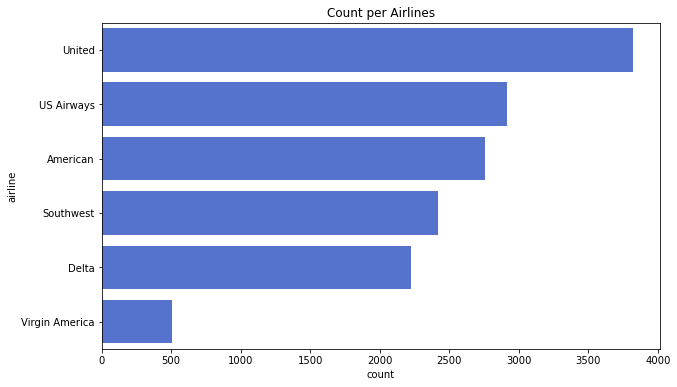

In [8]:
# Visual of airline companies review counts.
ax = sns.countplot(data = df, y = 'airline', color='royalblue'
                   ,order = df.airline.value_counts().index)
ax.set_title('Count per Airlines',)
                                    
plt.show()

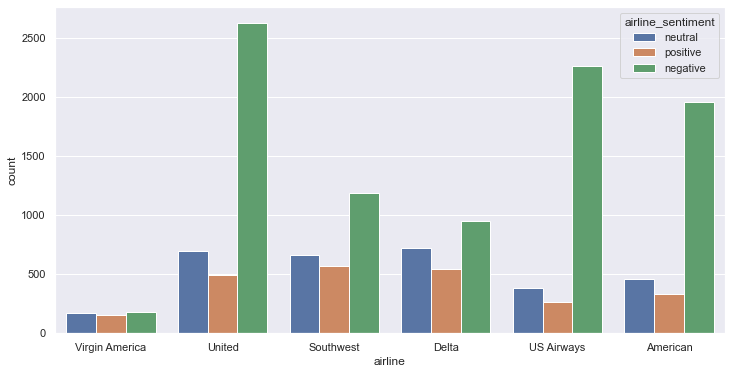

In [113]:
#Airline companies sentiment visualization.
sns.countplot(data = df, x ="airline", hue = "airline_sentiment");
sns.set(rc={"figure.figsize":(12, 6)})

In [ ]:
plt.bar()

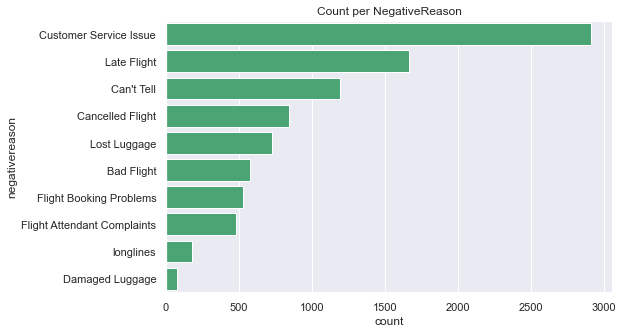

In [10]:
# Total negative reasons visual.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df, y = 'negativereason',
                   color='mediumseagreen',
                   order = df.negativereason.value_counts().index)
ax.set_title('Count per NegativeReason')

plt.show(a)

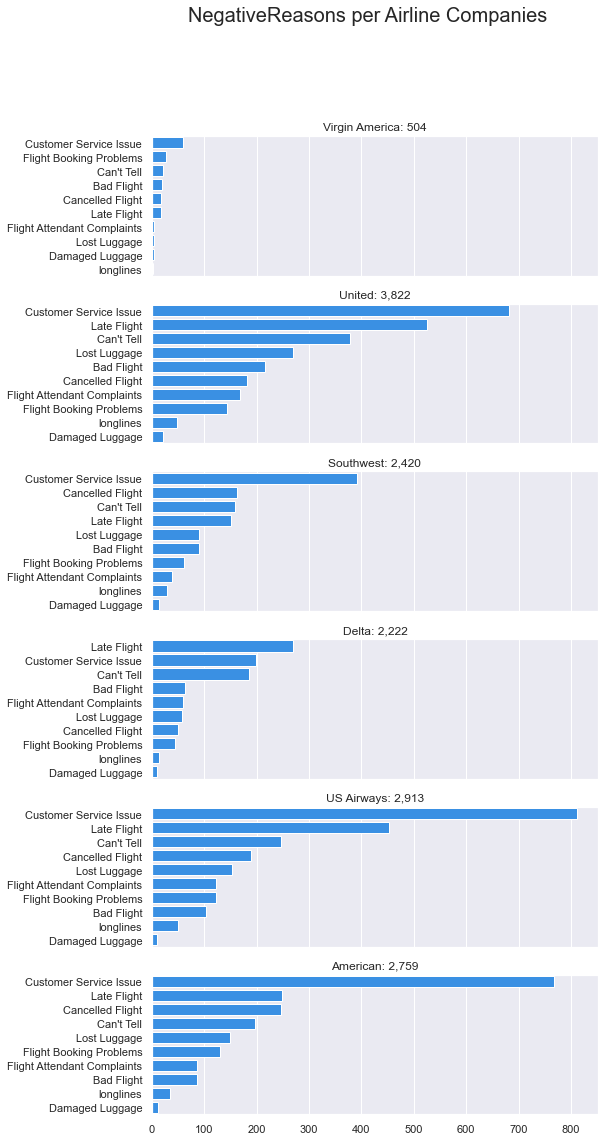

In [11]:
# Negative reasons per airline companies.
fig, axes = plt.subplots(6,1, figsize=(8,18), sharex=True)
axes = axes.flatten()
names = df['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = df[df.airline==name], y = 'negativereason',color='dodgerblue',
                       order = df[df.airline==name].negativereason.value_counts().index, ax = n)
    ax.set_title(f"{name}: {format(len(df[df.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("NegativeReasons per Airline Companies", fontsize = 20)
plt.show()




**American, US Airways, Southwest**: Complaints about customer sevice issue is relatively high.

**United :**  Customer service issue is the most, but customers for this airline experienced late flight more frequently than others. Lost luggage issue happened relatively high.

**Delta:** Customer service looks not bad, but most of customers experienced late flight.

**Virgin America:** Mostly about customer service followed by flight booking problem.


## Cleaning

In [12]:
# Copying data for secure original.
df2 = df.copy()

In [13]:
# Cleaning process from non alphabetic characters.
df2["text"] = df2["text"].str.replace("(@+\w+)", "")
df2["text"].head()

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: text, dtype: object

In [14]:
# Creating variable for english stopwords.
stop_words = stopwords.words('english')

In [15]:
# Creating function for cleaning, tokenize and lemmatization.
def cleaning(data):
    """ This function cleans each word from punctuations, lowers each character, removes stopwords and 
    lemmatization for each word."""
    
    #Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #Remove punctuations
    tokens_without_punc = [w for w in text_tokens if w.isalpha()] 
    
    #Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  
    
    #lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [16]:
#Applying function to target.
df2["text"] = df2["text"].apply(cleaning)
df2["text"].head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

In [17]:
" ".join(df2["text"]).split()

['said',
 'plus',
 'youve',
 'added',
 'commercial',
 'experience',
 'tacky',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seat',
 'didnt',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hat',
 'parody',
 'http',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'youre',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teen',
 'lt',
 'pretty',
 'graphic',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 'trip',
 'yet',
 'p',
 'im',
 'flying',
 'fabulous',
 'seductiv

In [18]:
# Removing all unnecessary columns.
df2 =df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


In [19]:
# Counting most common words.
corpus = " ".join(df2["text"])
tokens_count = Counter(word_tokenize(corpus)).most_common(20)
tokens_count

[('flight', 4544),
 ('get', 1374),
 ('http', 1210),
 ('hour', 1138),
 ('thanks', 1078),
 ('cancelled', 1056),
 ('u', 994),
 ('service', 989),
 ('time', 946),
 ('customer', 934),
 ('help', 869),
 ('bag', 766),
 ('im', 743),
 ('plane', 725),
 ('amp', 683),
 ('hold', 642),
 ('need', 633),
 ('thank', 602),
 ('still', 580),
 ('one', 580)]

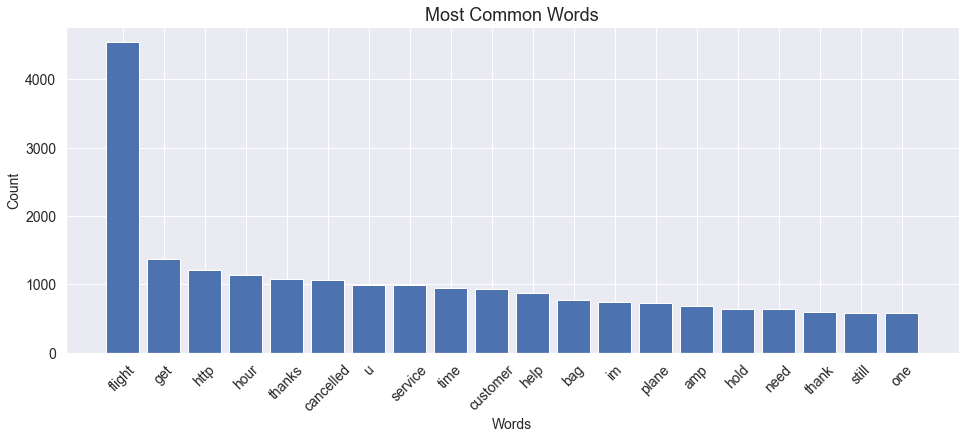

In [20]:
# Visaul of most common words.
dic= dict(tokens_count)
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(dic.keys(),dic.values())
ax.set_title('Most Common Words',fontsize=18)
plt.xlabel('Words',fontsize=14)
plt.ylabel('Count',fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize = 14)
plt.xticks(rotation=45)
plt.show()


In [21]:
# from sklearn import preprocessing
 
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
 
# # Encode labels in column 'species'.
# df['airline_sentiment']= label_encoder.fit_transform(df['airline_sentiment'])
 
# df['airline_sentiment'].value_counts()

## Train Test Split

In [22]:
# Train test split.
X =df2["text"]
y= df2["airline_sentiment"]

In [23]:
y.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [25]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [26]:
# Handling imbalanced using SMOTE
smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X_final,y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,random_state=101)

## Count Vectorizer

In [28]:
# Initializing Count Vectorizer.
c_vec = CountVectorizer()
X_final1= c_vec.fit_transform(X)

In [29]:
# Looking train set into array.
X_final1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
# Look dataframe after process.
pd.DataFrame(X_final1.toarray(), columns = c_vec.get_feature_names())

,aa,aaaand,aaadvantage,aaalwayslate,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aaron,aateam,ab,aback,abandon,abandoned,abandonment,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnews,abducted,abi,ability,...,ystrdy,yuck,yucki,yuma,yummy,yup,yvonne,yvr,yxe,yxu,yyc,yyj,yyz,zabsonre,zambia,zero,zfv,zip,zipper,zombie,zone,zoom,zrh,zukes,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#Creating function to evaluate our models.
def evaluation(model, X_train, X_test):
    
    """ This function created for visualization and resul to see train and test both sets results."""
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("==== Train Set ====")
    
    print(classification_report(y_train,y_pred_train))
    
    print("==== Test Set ====")
    
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model,X_test, y_test)
    plt.grid(None)
    

### Logistic Regression

In [32]:
# Initiliazing first model.
log = LogisticRegression(C = 0.02, max_iter=1000)
log.fit(X_train,y_train)    

LogisticRegression(C=0.02, max_iter=1000)

LOG MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.78      0.79      0.78      7353
     neutral       0.62      0.80      0.70      7343
    positive       0.85      0.60      0.71      7331

    accuracy                           0.73     22027
   macro avg       0.75      0.73      0.73     22027
weighted avg       0.75      0.73      0.73     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.77      0.78      0.77      1825
     neutral       0.61      0.78      0.69      1835
    positive       0.83      0.59      0.69      1847

    accuracy                           0.72      5507
   macro avg       0.74      0.72      0.72      5507
weighted avg       0.74      0.72      0.72      5507



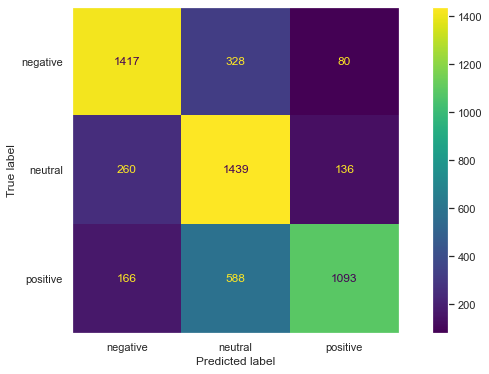

In [33]:
print("LOG MODEL")
evaluation(log, X_train, X_test)

### Naive Bayes

In [34]:
#Initiliazing second model.
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

NB MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.78      0.92      0.84      7353
     neutral       0.88      0.75      0.81      7343
    positive       0.90      0.89      0.89      7331

    accuracy                           0.85     22027
   macro avg       0.85      0.85      0.85     22027
weighted avg       0.85      0.85      0.85     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.74      0.86      0.79      1825
     neutral       0.81      0.69      0.74      1835
    positive       0.87      0.86      0.86      1847

    accuracy                           0.80      5507
   macro avg       0.81      0.80      0.80      5507
weighted avg       0.81      0.80      0.80      5507



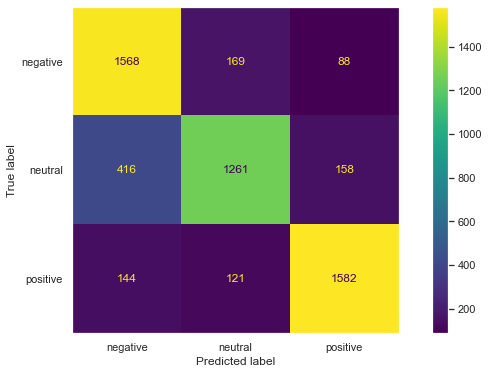

In [35]:
print("NB MODEL")
evaluation(nb, X_train, X_test)

### Ada Boost

In [36]:
#Initiliazing third model.
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.85      0.81      0.83      7353
     neutral       0.74      0.80      0.77      7343
    positive       0.86      0.84      0.85      7331

    accuracy                           0.81     22027
   macro avg       0.82      0.81      0.81     22027
weighted avg       0.82      0.81      0.81     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79      1825
     neutral       0.70      0.76      0.73      1835
    positive       0.83      0.80      0.82      1847

    accuracy                           0.78      5507
   macro avg       0.78      0.78      0.78      5507
weighted avg       0.78      0.78      0.78      5507



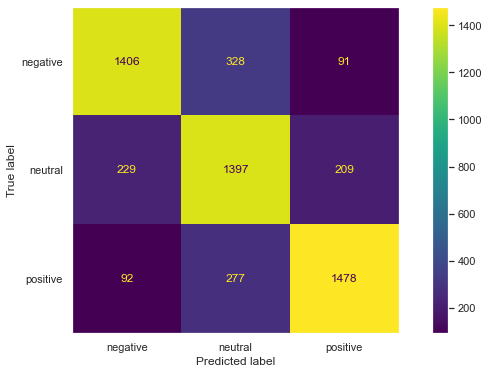

In [37]:
print("Ada MODEL")
evaluation(ada, X_train, X_test)


## TF-IDF

In [38]:
# Looking train set into array.
X_final.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Look dataframe after process.
pd.DataFrame(X_final.toarray(), columns = tfid.get_feature_names())

,aa,aaaand,aaadvantage,aaalwayslate,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aaron,aateam,ab,aback,abandon,abandoned,abandonment,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnews,abducted,abi,ability,...,ystrdy,yuck,yucki,yuma,yummy,yup,yvonne,yvr,yxe,yxu,yyc,yyj,yyz,zabsonre,zambia,zero,zfv,zip,zipper,zombie,zone,zoom,zrh,zukes,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Naive Bayes

In [40]:
#Initiliazing first model.
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

NB MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.78      0.92      0.84      7353
     neutral       0.88      0.75      0.81      7343
    positive       0.90      0.89      0.89      7331

    accuracy                           0.85     22027
   macro avg       0.85      0.85      0.85     22027
weighted avg       0.85      0.85      0.85     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.74      0.86      0.79      1825
     neutral       0.81      0.69      0.74      1835
    positive       0.87      0.86      0.86      1847

    accuracy                           0.80      5507
   macro avg       0.81      0.80      0.80      5507
weighted avg       0.81      0.80      0.80      5507



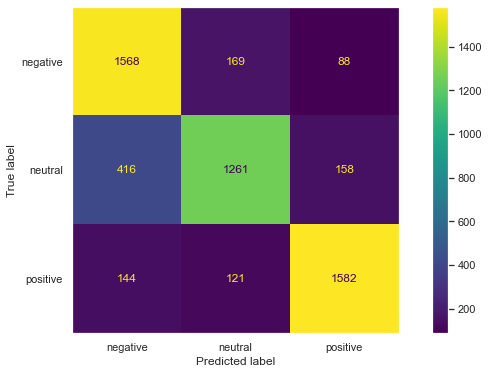

In [41]:
print("NB MODEL")
evaluation(nb, X_train, X_test)

### Logistic Regression

In [43]:
#Initiliazing second model.
log = LogisticRegression(C=0.4, max_iter=1000) 
log.fit(X_train,y_train)

LogisticRegression(C=0.4, max_iter=1000)

LOG MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.88      0.85      0.87      7353
     neutral       0.76      0.87      0.81      7343
    positive       0.89      0.79      0.84      7331

    accuracy                           0.84     22027
   macro avg       0.84      0.84      0.84     22027
weighted avg       0.84      0.84      0.84     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.85      0.80      0.82      1825
     neutral       0.70      0.83      0.76      1835
    positive       0.86      0.75      0.80      1847

    accuracy                           0.79      5507
   macro avg       0.80      0.79      0.80      5507
weighted avg       0.80      0.79      0.80      5507



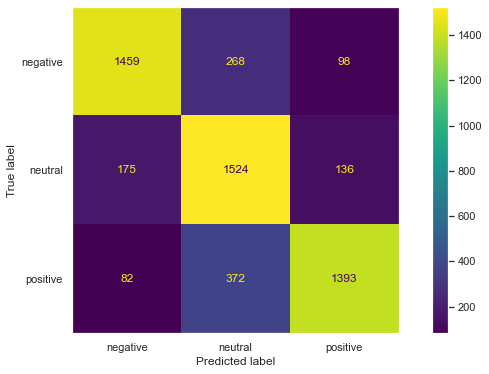

In [44]:
print("LOG MODEL")
evaluation(log, X_train, X_test)

### Random Forest

In [45]:
#Initiliazing third model.
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.95      0.86      0.90      7353
     neutral       0.76      0.92      0.83      7343
    positive       0.92      0.81      0.87      7331

    accuracy                           0.86     22027
   macro avg       0.88      0.86      0.87     22027
weighted avg       0.88      0.86      0.87     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.84      0.81      0.83      1825
     neutral       0.71      0.82      0.76      1835
    positive       0.86      0.77      0.81      1847

    accuracy                           0.80      5507
   macro avg       0.81      0.80      0.80      5507
weighted avg       0.81      0.80      0.80      5507



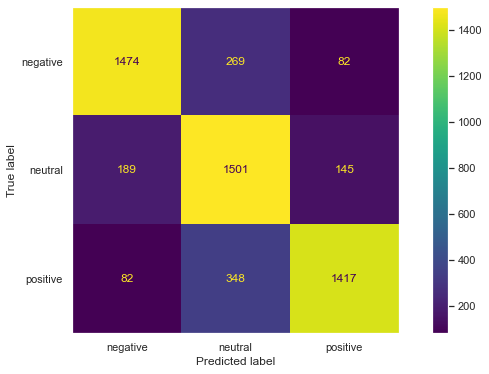

In [46]:
print("RF MODEL")
evaluation(rf, X_train, X_test)

### Gradient Boosting

In [47]:
#Initiliazing fourth model.
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

RF MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.83      0.72      0.77      7353
     neutral       0.64      0.82      0.72      7343
    positive       0.84      0.73      0.78      7331

    accuracy                           0.75     22027
   macro avg       0.77      0.75      0.76     22027
weighted avg       0.77      0.75      0.76     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.81      0.72      0.76      1825
     neutral       0.63      0.79      0.70      1835
    positive       0.81      0.70      0.75      1847

    accuracy                           0.74      5507
   macro avg       0.75      0.74      0.74      5507
weighted avg       0.75      0.74      0.74      5507



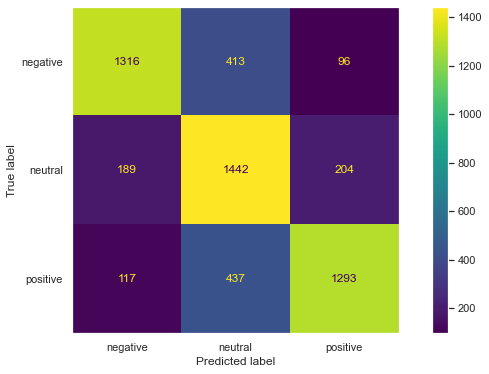

In [48]:
print("RF MODEL")
evaluation(gb, X_train, X_test)

### Ada Boost

In [49]:
#Initiliazing fifth model.
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
==== Train Set ====
              precision    recall  f1-score   support

    negative       0.85      0.81      0.83      7353
     neutral       0.74      0.80      0.77      7343
    positive       0.86      0.84      0.85      7331

    accuracy                           0.81     22027
   macro avg       0.82      0.81      0.81     22027
weighted avg       0.82      0.81      0.81     22027

==== Test Set ====
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79      1825
     neutral       0.70      0.76      0.73      1835
    positive       0.83      0.80      0.82      1847

    accuracy                           0.78      5507
   macro avg       0.78      0.78      0.78      5507
weighted avg       0.78      0.78      0.78      5507



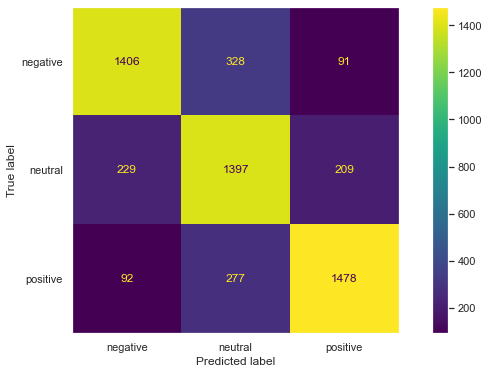

In [50]:
print("Ada MODEL")
evaluation(ada, X_train, X_test)


## Prediction

In [51]:
# Initializing pipeline.
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression(C=0.4, max_iter=1000))])

In [52]:
#Fitting.
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

In [53]:
#Example prediction.
tweet = "it was not the worst flight i have ever been"
tweet = pd.Series(tweet).apply(cleaning)  
pipe.predict(tweet)

array(['negative'], dtype=object)

In [54]:
#Example prediction.
tweet = "don't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [55]:
#Example prediction.
tweet = "ok flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['neutral'], dtype=object)

In [56]:
#Example prediction.
tweet = "doesn't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [57]:
#Example prediction.(""" WRONG PREDICTION BY MODEL """)
tweet = "liked"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

## Sequential

In [58]:
# Remembering data.
df2

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing
...,...,...
14635,positive,thank got different flight chicago
14636,negative,leaving minute late flight warning communicati...
14637,neutral,please bring american airline
14638,negative,money change flight dont answer phone suggesti...


In [59]:
#Creating target and feature.
target = df2['airline_sentiment']
data = df2['text'].map(word_tokenize).values

In [60]:
# Creating function to tokenize.
def tokenize(d):
    return word_tokenize(d)

In [61]:
# Creating variable for tokenized target variable.
texts_w2v = df2.text.apply(tokenize).to_list()

### Word2Vec Model

In [62]:
# Initializing Word2Vec model.
w2v = Word2Vec(sentences = texts_w2v, window = 3,
               vector_size = 100, min_count = 5, workers = 4, sg = 1)

In [63]:
# Looking for tokenized and listed data.
texts_w2v[:5]

[['said'],
 ['plus', 'youve', 'added', 'commercial', 'experience', 'tacky'],
 ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip'],
 ['really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guest',
  'face',
  'amp',
  'little',
  'recourse'],
 ['really', 'big', 'bad', 'thing']]

#### Similar words with the given word examples

In [64]:
#Looking for similar word with given words.
w2v.wv.most_similar('thank')

[('much', 0.9712535738945007),
 ('appreciate', 0.957404375076294),
 ('quick', 0.9558965563774109),
 ('response', 0.9437727332115173),
 ('reply', 0.9412276148796082),
 ('thanks', 0.9405701756477356),
 ('address', 0.9346233606338501),
 ('twitter', 0.9338992238044739),
 ('tweet', 0.9177289605140686),
 ('awesome', 0.9158724546432495)]

In [65]:
#Looking for similar word with given words.
w2v.wv.most_similar('customerservice')

[('neveragain', 0.9906761050224304),
 ('hanging', 0.9903817176818848),
 ('nightmare', 0.9902058243751526),
 ('extremely', 0.98977130651474),
 ('transferred', 0.9895574450492859),
 ('literally', 0.9894701242446899),
 ('abysmal', 0.98911452293396),
 ('entire', 0.9887540340423584),
 ('c', 0.9881405830383301),
 ('est', 0.9877815842628479)]

In [66]:
#Looking for similar word with given words.
w2v.wv.most_similar('crew')

[('ground', 0.910668671131134),
 ('pilot', 0.9052032828330994),
 ('attendant', 0.8672678470611572),
 ('staff', 0.862720251083374),
 ('landing', 0.8604944944381714),
 ('plane', 0.855948269367218),
 ('jfk', 0.8393176198005676),
 ('air', 0.8343712687492371),
 ('newark', 0.8316327333450317),
 ('communication', 0.8298751711845398)]

In [67]:
#Looking for similar word with given words.
w2v.wv.most_similar('delay')

[('delayed', 0.930374801158905),
 ('maintenance', 0.9065725207328796),
 ('stuck', 0.9056763052940369),
 ('runway', 0.9025688171386719),
 ('mechanical', 0.898987352848053),
 ('sfo', 0.8989124894142151),
 ('phx', 0.8928095698356628),
 ('dca', 0.8922531008720398),
 ('ewr', 0.8919305801391602),
 ('due', 0.8899293541908264)]

In [68]:
#Looking for similar word with given words.
w2v.wv.most_similar('ticket')

[('fee', 0.9300989508628845),
 ('refund', 0.9005745053291321),
 ('credit', 0.8991466760635376),
 ('award', 0.8973211050033569),
 ('name', 0.8930242657661438),
 ('use', 0.8758565783500671),
 ('mile', 0.874760627746582),
 ('upgrade', 0.8715870976448059),
 ('add', 0.8709031343460083),
 ('companion', 0.8661701083183289)]

In [69]:
# Creating vectors for every text.
def get_avg_vector(sent):
    """
    This function makes vector for every sepcific words in our text data.
    """
    
    vector = np.zeros(100)
    total_words = 0
    for word in sent.split():        
        if word in w2v.wv.index_to_key:  
            vector += w2v.wv.word_vec(word)
            total_words += 1
    if total_words > 0:
        return vector / total_words
    else:
        return vector
    
df2['w2v_vector'] = df2['text'].map(get_avg_vector)
df2[['text', 'w2v_vector']].head(2)

,text,w2v_vector
0,said,"[-0.10492859780788422, -0.0317985974252224, -0..."
1,plus youve added commercial experience tacky,"[-0.05421256273984909, 0.08681130036711693, -0..."


In [70]:
df2['w2v_vector'].values[0].shape

(100,)

In [71]:
# Checking three different models accuracy for improve further.
model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
#               MultinomialNB(),  # Don't use Naive Bayes since w2v_vector contains negative numbers, then it causes an error.
              SVC(**model_params)]
model_name = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(model_list, model_name):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df2.index, df2.airline_sentiment)):        
        X_trn = np.stack(df2.loc[trn_idx, 'w2v_vector'])
        y_trn = df2.loc[trn_idx, 'airline_sentiment']
        
        X_vld = np.stack(df2.loc[vld_idx, 'w2v_vector'])
        y_vld = df2.loc[vld_idx, 'airline_sentiment']        
        
        model.fit(X_trn, y_trn)
        pred_col = f"{model_name}_w2v_pred"
        df2.loc[vld_idx, pred_col] = model.predict(X_vld)
        

    print(f"Model: {model_name}, Word2Vec, Accuracy: {accuracy_score(df2.airline_sentiment, df2[pred_col]):.3%}\n")

Model: LogisticRegression, Word2Vec, Accuracy: 72.097%

Model: RandomForest, Word2Vec, Accuracy: 73.231%

Model: SupportVectorMachine, Word2Vec, Accuracy: 71.366%



In [72]:
#Making function for tokenize and padding.

max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df2['text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df2['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 said 

After Tokenization & Padding 
 [126   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [73]:
#Train test split.
y = pd.get_dummies(df.airline_sentiment)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (8198, 100) (8198, 3)
Validation Set: (3514, 100) (3514, 3)
Test Set:       (2928, 100) (2928, 3)


### Sequential Model

In [74]:
#Creating necessary variables and initializing sequential model. Adding layers.
vocab_size = 5000
embedding_size = 32
epochs=50
max_words = 5000
max_len = 100
batch_size = 64

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [75]:
#Compiling model. Looking into it.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
__________________________________________________

In [76]:
#Trying early stopping and fitting model.
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,validation_data=(X_vld, y_vld),batch_size=batch_size, epochs=epochs, verbose=1,callbacks = es)

Epoch 1/50
129/129 [==============================] - 3s 21ms/step - loss: 0.8581 - accuracy: 0.6353 - val_loss: 0.6958 - val_accuracy: 0.6932
Epoch 2/50
129/129 [==============================] - 2s 15ms/step - loss: 0.5911 - accuracy: 0.7577 - val_loss: 0.6155 - val_accuracy: 0.7513
Epoch 3/50
129/129 [==============================] - 2s 15ms/step - loss: 0.4488 - accuracy: 0.8308 - val_loss: 0.6184 - val_accuracy: 0.7570
Epoch 4/50
129/129 [==============================] - 2s 15ms/step - loss: 0.3456 - accuracy: 0.8740 - val_loss: 0.6514 - val_accuracy: 0.7592
Epoch 5/50
129/129 [==============================] - 2s 16ms/step - loss: 0.2666 - accuracy: 0.9061 - val_loss: 0.7258 - val_accuracy: 0.7627
Epoch 6/50
129/129 [==============================] - 2s 16ms/step - loss: 0.2090 - accuracy: 0.9300 - val_loss: 0.8141 - val_accuracy: 0.7527
Epoch 7/50
129/129 [==============================] - 2s 16ms/step - loss: 0.1664 - accuracy: 0.9454 - val_loss: 0.8885 - val_accuracy: 0.7541

In [77]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7702


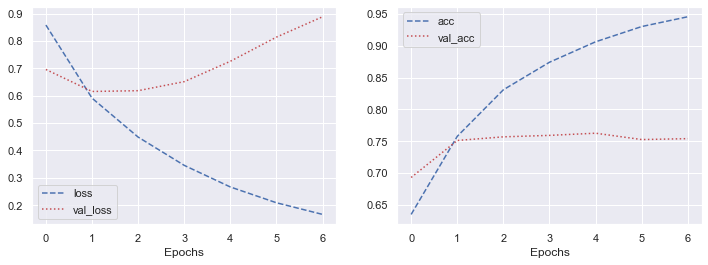

In [78]:
# Visualizing loss and accuracy on sequential model.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

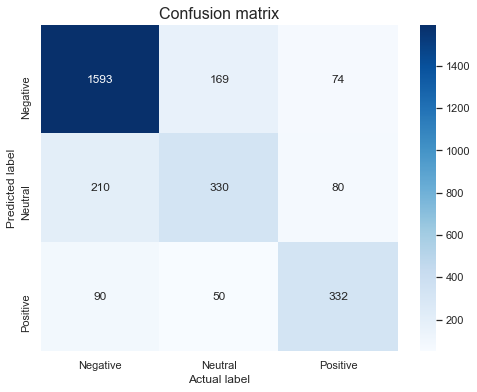

In [79]:
# Creating function to see confusion matrix for sequential model.

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_tst, y_tst)

### Second Model

In [80]:
# Train test split.
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (8198, 100) (8198, 3)
Validation Set: (3514, 100) (3514, 3)
Test Set:       (2928, 100) (2928, 3)


In [98]:
# Initializing another sequential model.
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [99]:
#Compiling and looking to model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                

In [100]:
# Trying early stopping and fitting model.
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])



Epoch 1/50
129/129 [==============================] - 3s 20ms/step - loss: 0.9266 - accuracy: 0.6287 - val_loss: 0.7298 - val_accuracy: 0.6801
Epoch 2/50
129/129 [==============================] - 2s 14ms/step - loss: 0.6229 - accuracy: 0.7254 - val_loss: 0.6483 - val_accuracy: 0.7282
Epoch 3/50
129/129 [==============================] - 2s 13ms/step - loss: 0.5046 - accuracy: 0.7886 - val_loss: 0.6614 - val_accuracy: 0.7368
Epoch 4/50
129/129 [==============================] - 2s 13ms/step - loss: 0.4303 - accuracy: 0.8368 - val_loss: 0.6897 - val_accuracy: 0.7373
Epoch 5/50
129/129 [==============================] - 2s 13ms/step - loss: 0.3743 - accuracy: 0.8622 - val_loss: 0.7631 - val_accuracy: 0.7353
Epoch 6/50
129/129 [==============================] - 2s 13ms/step - loss: 0.3320 - accuracy: 0.8786 - val_loss: 0.7979 - val_accuracy: 0.7291
Epoch 7/50
129/129 [==============================] - 2s 13ms/step - loss: 0.2956 - accuracy: 0.8980 - val_loss: 0.8781 - val_accuracy: 0.7368

In [101]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7592


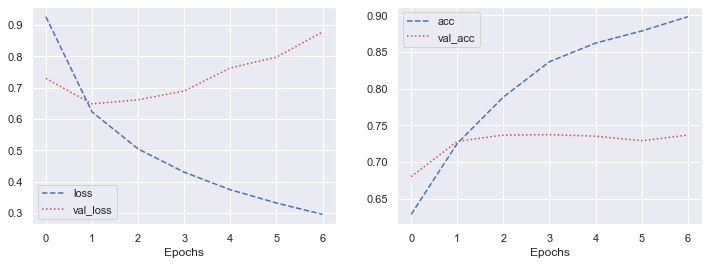

In [102]:
# Visualizing loss and accuracy on sequential model.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

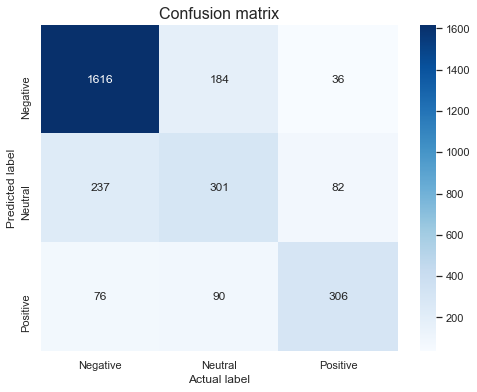

In [103]:
# Looking last model confusion matrix.  
plot_confusion_matrix(model, X_tst, y_tst)

## Recommmendations

1.For all the 6 companies should work on customer issue problems.

2.Virgin America needs to check booking problems.

3.Delta Airlines needs to look into late flight problems.

4.Overall late flight and cancellation flight problems needs to be solve for better service/more satisfied customer.

## Conclusion

With final model, prediction accuracy on test set is %92. What this mean is with the **customer review text** my model will predict 92/100 true positive, true neutral or true negative. 8 of 100 tweets is going to be false for true positive, neutral or negatives(as example: 'liked' tweet at prediction section predicted negative which is false negative).

Used accuracy score to evaluation metric because target variables(sentiment) positive,negative and neutral classes imbalanced and all of them equal important for us. We are not focusing just one of them and wanted to accuracy of each of them.

## Future Work

We can work on detail text and improve our model. For example we still get little bit of false positive,neutral or negatives. We would work why is that and what we could do more on our model.

Why liked tweet predicted negative etc.